<a href="https://colab.research.google.com/github/Mukesh-V-AI/deep-learning-laboratory/blob/main/dl_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading Iris dataset
Features shape: (150, 4)
Labels shape: (150, 1)

Step 2: Normalizing input features
Features normalized

Step 3: One-hot encoding class labels
Encoded labels shape: (150, 3)

Step 4: Splitting dataset into training and testing
Training samples: 120
Testing samples: 30

Step 5: Initializing neural network parameters
Weights and biases initialized

Step 6: Training the network using backpropagation
Epoch 0: Loss = 0.9323
Epoch 20: Loss = 0.1287
Epoch 40: Loss = 0.0806
Epoch 60: Loss = 0.0643
Epoch 80: Loss = 0.0554

Step 7: Testing the trained model
Final Accuracy: 1.0


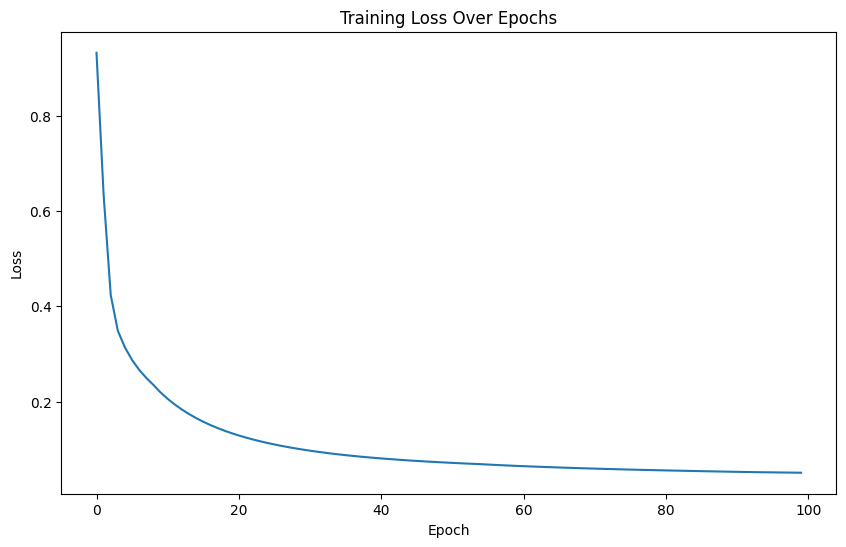

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("Step 1: Loading Iris dataset")
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

print("\nStep 2: Normalizing input features")
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Features normalized")

print("\nStep 3: One-hot encoding class labels")
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)
print("Encoded labels shape:", y.shape)

print("\nStep 4: Splitting dataset into training and testing")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

print("\nStep 5: Initializing neural network parameters")
input_size = 4
hidden_size = 8
output_size = 3
learning_rate = 0.01
epochs = 100

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
print("Weights and biases initialized")

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("\nStep 6: Training the network using backpropagation")

losses = []

for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-9), axis=1))
    losses.append(loss)

    error = a2 - y_train
    dW2 = np.dot(a1.T, error)
    db2 = np.sum(error, axis=0, keepdims=True)

    da1 = np.dot(error, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print("\nStep 7: Testing the trained model")

z1 = np.dot(X_test, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
a2 = softmax(z2)

y_pred = np.argmax(a2, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("Final Accuracy:", accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()